## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  73.746912  1716.098358  0.409708  10.712943  707.052703
1  95.722408   243.749853  0.607114  10.587701  176.180156
2  72.237880   286.780062  0.408610   4.320889  137.831788
3  73.558332  1545.324942  0.040606   7.369050   96.637911
4  37.859434  1445.205753  0.016284   1.952321   44.497802


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9781431	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9671917	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9576876	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9489925	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9368216	total: 60ms	remaining: 11.9s
5:	learn: 0.9252500	total: 60.5ms	remaining: 10s
6:	learn: 0.9127693	total: 61ms	remaining: 8.65s
7:	learn: 0.9015299	total: 61.6ms	remaining: 7.64s
8:	learn: 0.8888229	total: 62.2ms	remaining: 6.84s
9:	learn: 0.8764217	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8649153	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8512450	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8403484	total: 64ms	remaining: 4.86s
13:	learn: 0.8275973	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8166886	total: 64.8ms	remaining: 4.26s
15:	learn: 0.8074588	total: 65.4ms	remaining: 4.02s
16:	learn: 0.7958646	total: 65.9ms	remaining: 3.81s
17:	learn: 0.7866357	total: 66.4ms	remaining: 3.62s
18:	learn: 0.7784805	total: 66.9ms	remaining: 3.45s
1

107:	learn: 0.2881365	total: 106ms	remaining: 875ms
108:	learn: 0.2853974	total: 106ms	remaining: 870ms
109:	learn: 0.2826898	total: 107ms	remaining: 864ms
110:	learn: 0.2800984	total: 107ms	remaining: 859ms
111:	learn: 0.2771033	total: 108ms	remaining: 854ms
112:	learn: 0.2744477	total: 108ms	remaining: 847ms
113:	learn: 0.2724709	total: 108ms	remaining: 841ms
114:	learn: 0.2696105	total: 109ms	remaining: 837ms
115:	learn: 0.2671255	total: 109ms	remaining: 833ms
116:	learn: 0.2652814	total: 110ms	remaining: 827ms
117:	learn: 0.2631943	total: 110ms	remaining: 822ms
118:	learn: 0.2606408	total: 110ms	remaining: 818ms
119:	learn: 0.2584512	total: 111ms	remaining: 814ms
120:	learn: 0.2564261	total: 111ms	remaining: 809ms
121:	learn: 0.2538626	total: 112ms	remaining: 806ms
122:	learn: 0.2513977	total: 112ms	remaining: 802ms
123:	learn: 0.2490318	total: 113ms	remaining: 799ms
124:	learn: 0.2466583	total: 114ms	remaining: 795ms
125:	learn: 0.2449075	total: 114ms	remaining: 791ms
126:	learn: 

297:	learn: 0.0746042	total: 185ms	remaining: 437ms
298:	learn: 0.0741853	total: 186ms	remaining: 436ms
299:	learn: 0.0739426	total: 186ms	remaining: 435ms
300:	learn: 0.0736677	total: 187ms	remaining: 434ms
301:	learn: 0.0731518	total: 187ms	remaining: 432ms
302:	learn: 0.0726232	total: 187ms	remaining: 431ms
303:	learn: 0.0721342	total: 188ms	remaining: 430ms
304:	learn: 0.0719028	total: 188ms	remaining: 429ms
305:	learn: 0.0716221	total: 188ms	remaining: 427ms
306:	learn: 0.0713684	total: 189ms	remaining: 426ms
307:	learn: 0.0711053	total: 189ms	remaining: 425ms
308:	learn: 0.0706037	total: 190ms	remaining: 424ms
309:	learn: 0.0703511	total: 190ms	remaining: 423ms
310:	learn: 0.0698425	total: 190ms	remaining: 422ms
311:	learn: 0.0692853	total: 191ms	remaining: 421ms
312:	learn: 0.0690786	total: 191ms	remaining: 420ms
313:	learn: 0.0685826	total: 192ms	remaining: 419ms
314:	learn: 0.0681308	total: 192ms	remaining: 418ms
315:	learn: 0.0678969	total: 193ms	remaining: 417ms
316:	learn: 

535:	learn: 0.0244476	total: 287ms	remaining: 249ms
536:	learn: 0.0243449	total: 288ms	remaining: 248ms
537:	learn: 0.0242440	total: 289ms	remaining: 248ms
538:	learn: 0.0241341	total: 289ms	remaining: 247ms
539:	learn: 0.0240353	total: 289ms	remaining: 247ms
540:	learn: 0.0239214	total: 290ms	remaining: 246ms
541:	learn: 0.0238138	total: 290ms	remaining: 245ms
542:	learn: 0.0237025	total: 290ms	remaining: 244ms
543:	learn: 0.0235933	total: 291ms	remaining: 244ms
544:	learn: 0.0235336	total: 291ms	remaining: 243ms
545:	learn: 0.0234288	total: 292ms	remaining: 243ms
546:	learn: 0.0233260	total: 292ms	remaining: 242ms
547:	learn: 0.0232225	total: 292ms	remaining: 241ms
548:	learn: 0.0231640	total: 293ms	remaining: 241ms
549:	learn: 0.0230509	total: 293ms	remaining: 240ms
550:	learn: 0.0229759	total: 294ms	remaining: 239ms
551:	learn: 0.0228757	total: 294ms	remaining: 239ms
552:	learn: 0.0227787	total: 294ms	remaining: 238ms
553:	learn: 0.0227056	total: 295ms	remaining: 237ms
554:	learn: 

723:	learn: 0.0131592	total: 367ms	remaining: 140ms
724:	learn: 0.0131207	total: 368ms	remaining: 139ms
725:	learn: 0.0130721	total: 368ms	remaining: 139ms
726:	learn: 0.0130315	total: 369ms	remaining: 138ms
727:	learn: 0.0129939	total: 369ms	remaining: 138ms
728:	learn: 0.0129464	total: 369ms	remaining: 137ms
729:	learn: 0.0128789	total: 370ms	remaining: 137ms
730:	learn: 0.0128555	total: 370ms	remaining: 136ms
731:	learn: 0.0128091	total: 371ms	remaining: 136ms
732:	learn: 0.0127700	total: 371ms	remaining: 135ms
733:	learn: 0.0127349	total: 371ms	remaining: 135ms
734:	learn: 0.0126938	total: 372ms	remaining: 134ms
735:	learn: 0.0126709	total: 372ms	remaining: 134ms
736:	learn: 0.0126219	total: 373ms	remaining: 133ms
737:	learn: 0.0125875	total: 373ms	remaining: 132ms
738:	learn: 0.0125425	total: 373ms	remaining: 132ms
739:	learn: 0.0125020	total: 374ms	remaining: 131ms
740:	learn: 0.0124581	total: 374ms	remaining: 131ms
741:	learn: 0.0124183	total: 375ms	remaining: 130ms
742:	learn: 

964:	learn: 0.0066187	total: 469ms	remaining: 17ms
965:	learn: 0.0066058	total: 470ms	remaining: 16.5ms
966:	learn: 0.0065839	total: 470ms	remaining: 16ms
967:	learn: 0.0065611	total: 471ms	remaining: 15.6ms
968:	learn: 0.0065484	total: 471ms	remaining: 15.1ms
969:	learn: 0.0065294	total: 471ms	remaining: 14.6ms
970:	learn: 0.0065192	total: 472ms	remaining: 14.1ms
971:	learn: 0.0065005	total: 472ms	remaining: 13.6ms
972:	learn: 0.0064850	total: 473ms	remaining: 13.1ms
973:	learn: 0.0064665	total: 473ms	remaining: 12.6ms
974:	learn: 0.0064541	total: 474ms	remaining: 12.1ms
975:	learn: 0.0064251	total: 474ms	remaining: 11.7ms
976:	learn: 0.0064014	total: 475ms	remaining: 11.2ms
977:	learn: 0.0063893	total: 475ms	remaining: 10.7ms
978:	learn: 0.0063682	total: 475ms	remaining: 10.2ms
979:	learn: 0.0063563	total: 476ms	remaining: 9.71ms
980:	learn: 0.0063384	total: 476ms	remaining: 9.23ms
981:	learn: 0.0063169	total: 477ms	remaining: 8.74ms
982:	learn: 0.0062993	total: 477ms	remaining: 8.25

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

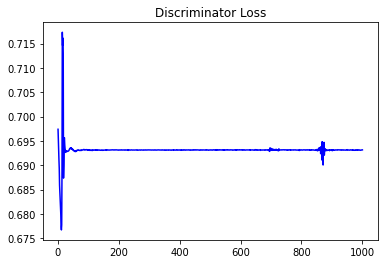

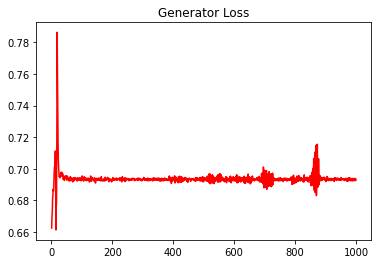

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.023789918753970046


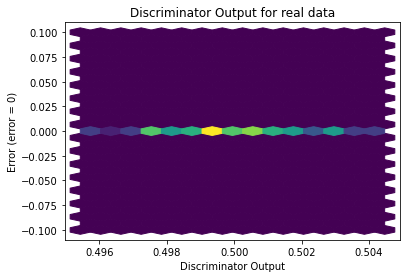

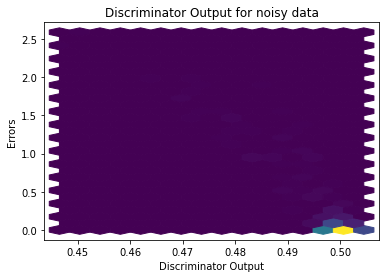

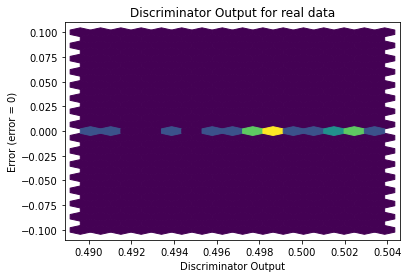

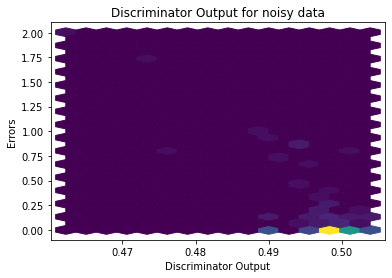

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


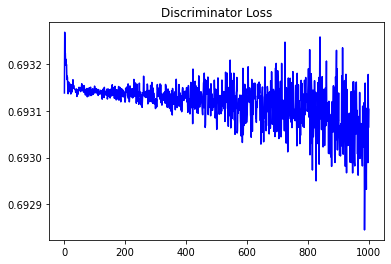

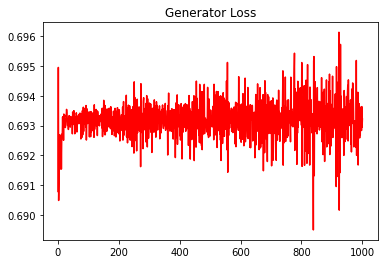

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06789937045139059


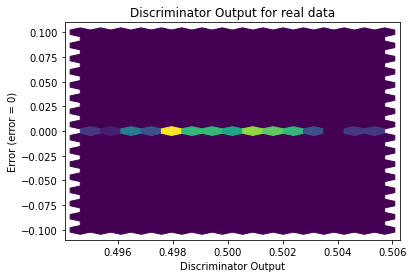

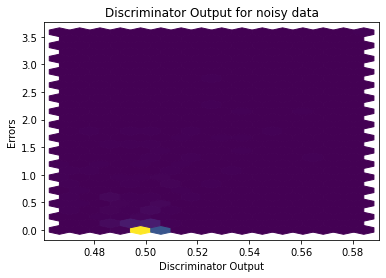

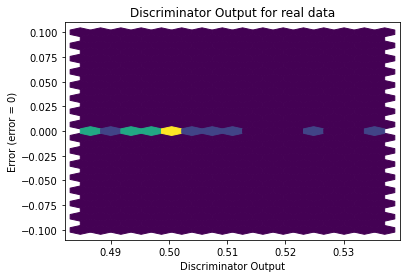

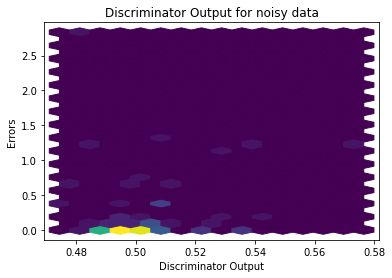

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
